# 3. 기상데이터 분석
* 평균 기온이 상승했을까?
* 가장 더웠던 날과 최고 기온?
* 가장 추웠던 날과 최저 기온?
* 일교차가 가장 큰 날?
* 우리나라에서 가장 추운 지역?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('seoul_temperature.csv', encoding='euc-kr')
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [7]:
df.shape

(41127, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41127 entries, 0 to 41126
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41127 non-null  object 
 1   지점       41127 non-null  int64  
 2   평균기온(℃)  40371 non-null  float64
 3   최저기온(℃)  40370 non-null  float64
 4   최고기온(℃)  40369 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41127.0,40371.000000,40370.000000,40369.000000
mean,108.0,11.739811,7.445457,16.747876
std,0.0,10.651920,10.876840,10.976389
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.200000
50%,108.0,12.900000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


In [10]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


In [11]:
df.drop('지점', axis=1, inplace=True)
df.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


In [12]:
df.columns = ['날짜', '평균', '최저', '최고']
df.head()

,날짜,평균,최저,최고
0,1907-10-01,13.5,7.9,20.7
1,1907-10-02,16.2,7.9,22.0
2,1907-10-03,16.2,13.1,21.3
3,1907-10-04,16.5,11.2,22.0
4,1907-10-05,17.6,10.9,25.4


In [19]:
df.날짜 = pd.to_datetime(df.날짜, format="%Y-%m-%d")
df.head()

,날짜,평균,최저,최고,년도
0,1907-10-01,13.5,7.9,20.7,1907
1,1907-10-02,16.2,7.9,22.0,1907
2,1907-10-03,16.2,13.1,21.3,1907
3,1907-10-04,16.5,11.2,22.0,1907
4,1907-10-05,17.6,10.9,25.4,1907


In [20]:
df['년도'] = df.날짜.dt.year
df['월'] = df.날짜.dt.month
df['일'] = df.날짜.dt.day
df.head()

,날짜,평균,최저,최고,년도,월,일
0,1907-10-01,13.5,7.9,20.7,1907,10,1
1,1907-10-02,16.2,7.9,22.0,1907,10,2
2,1907-10-03,16.2,13.1,21.3,1907,10,3
3,1907-10-04,16.5,11.2,22.0,1907,10,4
4,1907-10-05,17.6,10.9,25.4,1907,10,5


In [28]:
# 평균 기온이 상승할까?
df_8 = df[(df.월 == 8) & (df.일 == 1)][['년도', '평균']]
df_8.head()

,년도,평균
305,1908,26.2
670,1909,26.5
1035,1910,27.0
1400,1911,25.1
1766,1912,26.2


In [29]:
df_12 = df[(df.월 == 12 ) & (df.일 == 1)][['년도', '평균']]
df_12

,년도,평균
61,1907,-4.6
427,1908,-1.9
792,1909,-4.0
1157,1910,-1.3
1522,1911,3.1
...,...,...
39443,2016,4.1
39808,2017,-2.2
40173,2018,5.5
40538,2019,4.6


<AxesSubplot:xlabel='년도', ylabel='평균'>

C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\qkrwn\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from cur

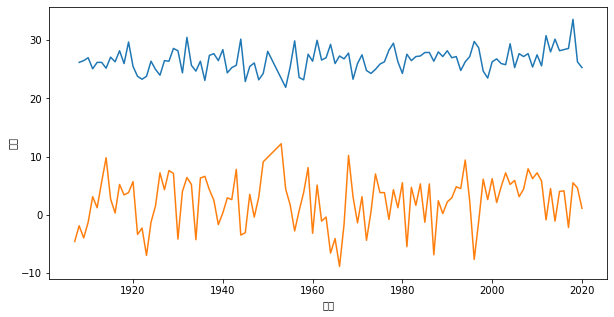

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='년도', y='평균', data=df_8)
sns.lineplot(x='년도', y='평균', data=df_12)

In [34]:
# 가장 더웠던 날과 그 온도
df_max = df.sort_values(by='최고', ascending=False)
df_max.head(10)

,날짜,평균,최저,최고,년도,월,일
40051,2018-08-01,33.6,27.8,39.6,2018,8,1
31277,1994-07-24,33.1,28.1,38.4,1994,7,24
40050,2018-07-31,32.6,27.8,38.3,2018,7,31
31276,1994-07-23,32.6,28.0,38.2,1994,7,23
11636,1939-08-10,30.1,24.5,38.2,1939,8,10
13111,1943-08-24,29.0,23.2,38.2,1943,8,24
40041,2018-07-22,31.8,25.3,38.0,2018,7,22
40065,2018-08-15,31.7,28.3,38.0,2018,8,15
40052,2018-08-02,33.7,30.3,37.9,2018,8,2
13115,1943-08-28,29.2,24.5,37.9,1943,8,28


In [36]:
#가장 추웠던 날
df_min = df.sort_values(by='최저', ascending=True)
df_min.head(10)

,날짜,평균,최저,최고,년도,월,일
7396,1927-12-31,-15.3,-23.1,-6.4,1927,12,31
8503,1931-01-11,-17.4,-22.5,-14.7,1931,1,11
4478,1920-01-04,-14.7,-22.3,-8.5,1920,1,4
7401,1928-01-05,-15.1,-22.2,-10.6,1928,1,5
8502,1931-01-10,-18.9,-21.9,-13.0,1931,1,10
3747,1918-01-03,-14.4,-21.8,-7.7,1918,1,3
7403,1928-01-07,-13.8,-21.7,-7.0,1928,1,7
1200,1911-01-13,-15.3,-21.5,-9.2,1911,1,13
2662,1915-01-14,-18.0,-21.3,-13.8,1915,1,14
2661,1915-01-13,-19.2,-21.3,-16.3,1915,1,13


In [41]:
# 일교차가 가장 큰 날
df['일교차'] = df.최고 - df.최저
df.head()

,날짜,평균,최저,최고,년도,월,일,일교차
0,1907-10-01,13.5,7.9,20.7,1907,10,1,12.8
1,1907-10-02,16.2,7.9,22.0,1907,10,2,14.1
2,1907-10-03,16.2,13.1,21.3,1907,10,3,8.2
3,1907-10-04,16.5,11.2,22.0,1907,10,4,10.8
4,1907-10-05,17.6,10.9,25.4,1907,10,5,14.5


In [42]:
pd.DataFrame(df.groupby('월')['일교차'].mean())

,일교차
월,
1,8.428887
2,8.869219
3,9.587794
4,10.818408
5,10.842546
6,9.741171
7,7.372493
8,7.959560
9,9.480795
